In [ ]:
# IMPORT TOOLS FROM LANGCHAIN COMMUNITY

from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [3]:
# SETUP ARXIV TOOL

# Create API wrapper for Arxiv with limits on number of results and character count
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)

# Initialize Arxiv query tool
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query arxiv papers")

# Print the tool name to verify
print(arxiv.name)

arxiv


In [4]:
# Test Arxiv query
arxiv.invoke("generative ai?")

'Published: 2024-07-09\nTitle: EA4RCA:Efficient AIE accelerator design framework for Regular Communication-Avoiding Algorithm\nAuthors: W. B. Zhang, Y. Q. Liu, T. H. Zang, Z. S. Bao\nSummary: With the introduction of the Adaptive Intelligence Engine (AIE), the Versal\nAdaptive Compute Acceleration Platform (Versal ACAP) has garnered great\nattention. However, the current focus of Vitis Libraries and limited research\nhas mainly been on how to invoke AIE modules, without delving into a thorough\ndiscussi'

In [5]:
# SETUP WIKIPEDIA TOOL

# Create API wrapper for Wikipedia with limits
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)

# Initialize Wikipedia query tool
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)

# Print tool name
wiki.name

'wikipedia'

In [6]:

# LOAD ENVIRONMENT VARIABLES

from dotenv import load_dotenv
load_dotenv()  # Load variables from .env file

import os
# Set API keys for Tavily and Groq from environment
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [7]:
# SETUP TAVILY SEARCH TOOL

from langchain_community.tools.tavily_search import TavilySearchResults

# Initialize Tavily search tool
tavily = TavilySearchResults()

# Test Tavily tool with a query
tavily.invoke("Provide me the recent AI news?")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13280\781675088.py:6: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


[{'title': 'The latest AI news we announced in September - The Keyword',
  'url': 'https://blog.google/technology/ai/google-ai-updates-september-2025/',
  'content': "In September, Google significantly upgraded its AI capabilities across core services like Chrome and Search. You can now use Gemini in Chrome as an AI browsing assistant and Search has an upgraded AI Mode for visual inspiration. Also, Google DeepMind introduced new robotics models, and NotebookLM gained new learning features.\n\nSummaries were generated by Google AI. Generative AI is experimental.\n\n## Shakespeare-ish [...] The Keyword\n\nThe latest AI news we announced in September\n\nSubscribe\n\n# The latest AI news we announced in September\n\nOct 08, 2025\n\n·\n\nShare\n\nTwitter Facebook LinkedIn Mail\n\nHere’s a recap of some of our biggest AI updates from September, including an AI upgrade for Chrome, a new visual search option in AI Mode and the next step in bringing helpful robots into the physical world.\n\nKe

In [8]:
# COMBINE TOOLS INTO A LIST

tools = [arxiv, wiki, tavily]  # LLM can now call any of these tools

In [9]:
# INITIALIZE LLM MODEL

from langchain_groq import ChatGroq

# Initialize Groq LLM with specified model
llm = ChatGroq(model="llama-3.1-8b-instant")

# Test LLM with a simple query
llm.invoke("What is AI")

AIMessage(content='Artificial Intelligence (AI) refers to the development of computer systems that can perform tasks that would typically require human intelligence. These tasks include:\n\n1. **Learning**: AI systems can learn from data, identify patterns, and improve their performance over time.\n2. **Problem-solving**: AI systems can solve complex problems, make decisions, and adapt to new situations.\n3. **Perception**: AI systems can interpret and understand data from sensors, such as images, speech, and text.\n4. **Reasoning**: AI systems can draw conclusions, make inferences, and use logic to arrive at decisions.\n5. **Creativity**: AI systems can generate new ideas, music, art, and even writing.\n\nAI involves the use of various techniques, including:\n\n1. **Machine learning**: A type of AI that enables systems to learn from data and improve their performance over time.\n2. **Deep learning**: A type of machine learning that uses neural networks to analyze data.\n3. **Natural l

In [ ]:
# Bind LLM with the tools so it can call them automatically
llm_with_tools = llm.bind_tools(tools=tools)


In [ ]:
# TEST LLM WITH TOOLS

llm_with_tools.invoke("What is the recent news on AI?") #tavily search has been made


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ccqnfqdb1', 'function': {'arguments': '{"query":"recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 461, 'total_tokens': 482, 'completion_time': 0.035180307, 'prompt_time': 0.026118694, 'queue_time': 0.044252111, 'total_time': 0.061299001}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ab04adca7d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--691b4a71-433b-4875-958b-c3763c8826d8-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on AI'}, 'id': 'ccqnfqdb1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 461, 'output_tokens': 21, 'total_tokens': 482})

In [ ]:
llm_with_tools.invoke("What is the latest research on quantum computing?")   #arxiv call has been made

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'd4djpbv2e', 'function': {'arguments': '{"query":"latest research quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 462, 'total_tokens': 480, 'completion_time': 0.032537963, 'prompt_time': 0.025623861, 'queue_time': 0.045587848, 'total_time': 0.058161824}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ab04adca7d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8302754a-d43f-44c5-8448-db1f76882021-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'latest research quantum computing'}, 'id': 'd4djpbv2e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 462, 'output_tokens': 18, 'total_tokens': 480})

In [ ]:
llm_with_tools.invoke("What is machine learning?") #wiki has been called

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'dz7344c87', 'function': {'arguments': '{"query":"Machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 458, 'total_tokens': 473, 'completion_time': 0.066257829, 'prompt_time': 0.028221011, 'queue_time': 0.045480603, 'total_time': 0.09447884}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7b3cfae3af', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--7573f007-d1d3-4ebf-903d-10f026a73646-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine learning'}, 'id': 'dz7344c87', 'type': 'tool_call'}], usage_metadata={'input_tokens': 458, 'output_tokens': 15, 'total_tokens': 473})

In [ ]:
# STATE SCHEMA FOR LANGGRAPH

from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [ ]:
# Define State schema with a list of messages (human or AI)
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    

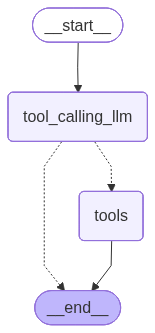

In [21]:
# BUILD LANGGRAPH CHATBOT

from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define function for LLM node
def tool_calling_llm(state: State):
    # Call LLM with tools using current messages and return as messages
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Initialize graph builder with State schema
builder = StateGraph(State)

# Add nodes
builder.add_node("tool_calling_llm", tool_calling_llm)  # LLM node
builder.add_node("tools", ToolNode(tools))             # Tools node

# -----------------------------
# DEFINE GRAPH EDGES
# -----------------------------
builder.add_edge(START, "tool_calling_llm")  # Start -> LLM node

# Conditional routing based on whether LLM output requires a tool
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)

# Tools node routes to end
builder.add_edge("tools", END)

# Compile the graph
graph = builder.compile()

# Display graph visually
display(Image(graph.get_graph().draw_mermaid_png()))

In [22]:
# TEST CHATBOT WITH SAMPLE MESSAGES
# -----------------------------
messages = graph.invoke({"messages": "Attention is all you need"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Attention is all you need
================================== Ai Message ==================================
Tool Calls:
  wikipedia (pbvyt4g5e)
 Call ID: pbvyt4g5e
  Args:
    query: Attention Is All You Need paper
================================= Tool Message =================================
Name: wikipedia

Page: Attention Is All You Need
Summary: "Attention Is All You Need" is a 2017 landmark research paper in machine learning authored by eight scientists working at Google. The paper introduced a new deep learning architecture known as the transformer, based on the attention mechanism proposed in 2014 by Bahdanau et al. It is considered a foundational paper in modern artificial intelligence, and a main contributor to the AI boom, as the transformer approach has become the main architecture of a wi


In [23]:
messages = graph.invoke({"messages": "Hi My name is Zishan"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi My name is Zishan
================================== Ai Message ==================================

I'm happy to chat with you, Zishan. Is there something I can help you with or would you like to talk about something in particular?


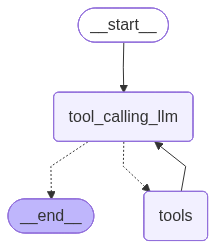

In [24]:
# IMPLEMENT ReACt AGENT ARCHITECTURE
# -----------------------------
# Node definition for ReACt agent
def tool_calling_llm(state: State):
    # LLM evaluates current messages and decides if tool call needed
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph for ReACt
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

# Graph edges: Start -> LLM -> Conditional tools -> Loop back
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)
builder.add_edge("tools", "tool_calling_llm")  # Loop back for ReACt

# Compile graph
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
# TEST ReACt AGENT

messages = graph.invoke({
    "messages": "What is the recent AI news and then please tell me the recent research paper on quantum computing?"
})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (vyym76hb8)
 Call ID: vyym76hb8
  Args:
    query: recent AI news
  arxiv (0c733xwnk)
 Call ID: 0c733xwnk
  Args:
    query: quantum computing recent research
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The Latest AI News and AI Breakthroughs that Matter Most: 2025", "url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "content": "Summary: Xiaomi has announced a next-gen AI voice model optimized for in-car and smart home experiences. The model features faster response times, offline", "score": 0.9854}, {"title": "The 2025 AI Index Report | Stanford HAI", "url": "https://hai.stanford.edu/ai-ind